<a href="https://colab.research.google.com/github/maddali-bansi/Tensorflow-NLP/blob/master/Vemana_Poems_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
lines = [line.rstrip() for line in open('poems.txt')]

In [ ]:
lines = [line for line in lines if line!='']

In [ ]:
lines[0]

'Uppu Kappurambu nokka polika nundu'

In [ ]:
len(lines)

56

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(lines)

In [ ]:
tokenizer.word_index

{'acharamadi': 40,
 'adamburamu': 46,
 'addamandu': 70,
 'alpudeppudu': 45,
 'anagananaga': 54,
 'anuvu': 63,
 'apadiana': 73,
 'atmasuddhi': 39,
 'bandhula': 75,
 'bantu': 77,
 'bhakti': 35,
 'bhandasuddhi': 41,
 'bhayamuvela': 76,
 'bodula': 99,
 'bodulina': 97,
 'bomma': 147,
 'brapti': 87,
 'chaalu': 9,
 'challaganu': 49,
 'cheppulona': 101,
 'chercharaadaya': 129,
 'chevilona': 103,
 'chinuku': 15,
 'chippalonabadda': 82,
 'chittasuddi': 43,
 'chooda': 4,
 'chota': 14,
 'dharalona': 62,
 'ela': 10,
 'eluka': 138,
 'gaanu': 126,
 'gadaya': 112,
 'gadu': 68,
 'galise': 86,
 'galugabodhu': 95,
 'galugu': 88,
 'gangi': 30,
 'gani': 13,
 'ganu': 47,
 'garitadainanu': 32,
 'gattagane': 93,
 'govu': 31,
 'gunamu': 81,
 'intilona': 109,
 'intinta': 111,
 'inumu': 120,
 'irumaaru': 121,
 'jaada': 24,
 'janulakella': 116,
 'joriga': 104,
 'judu': 6,
 'kaachi': 123,
 'kadhu': 145,
 'kadivedainanemi': 33,
 'kali': 107,
 'kalugu': 36,
 'kanakammu': 52,
 'kanchu': 50,
 'kantilona': 105,
 'kappu

In [ ]:
total_words = len(tokenizer.word_index) +1

In [ ]:
total_words

150

In [ ]:
lines_1 = lines[:2]

In [ ]:
lines_1

['Uppu Kappurambu nokka polika nundu', 'Chooda chooda ruchulu jaada veru']

In [ ]:
input_sequences = []
for line in lines_1 :
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_grams = token_list[:i+1]
    input_sequences.append(n_grams)

Generated Tokens---> [19, 20, 21, 22, 7]
[19, 20]
[19, 20, 21]
[19, 20, 21, 22]
[19, 20, 21, 22, 7]


In [ ]:
from indic_transliteration import sanscript 
from indic_transliteration.sanscript import transliterate
def translate(text):
  return transliterate(text, sanscript.ITRANS, sanscript.TELUGU)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
5/5 [==============================] - 4s 6ms/step - loss: 5.0094 - accuracy: 0.0453
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 4.9985 - accuracy: 0.2362
Epoch 3/500
5/5 [==============================] - 0s 7ms/step - loss: 4.9897 - accuracy: 0.1741
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 4.9808 - accuracy: 0.1641
Epoch 5/500
5/5 [==============================] - 0s 6ms/step - loss: 4.9659 - accuracy: 0.1767
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 4.9454 - accuracy: 0.1841
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 4.9241 - accuracy: 0.1784
Epoch 8/500
5/5 [==============================] - 0s 6ms/step - loss: 4.8927 - accuracy: 0.1645
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 4.8389 - accuracy: 0.1613
Epoch 10/500
5/5 [==============================] - 0s 6ms/step - loss: 4.7755 - accuracy: 0.0841
Epoch 11/500
5/5 [===========

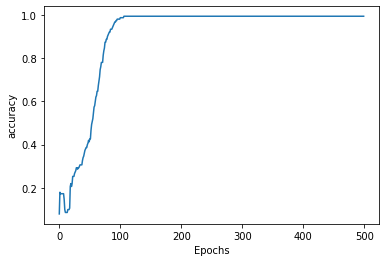

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

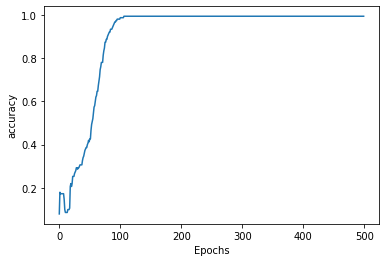

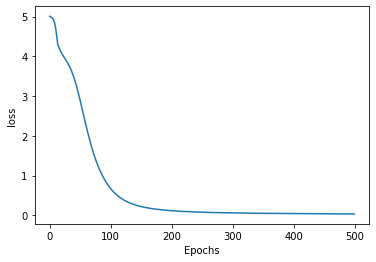

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
inputs = ['viswadhaabhiraama','cheppulona','atmasuddhi','bhakti']
actual = ['viswadhaabhiraama vinura vema','cheppulona rayi chevilona joriga','atmasuddhi leni acharamadi ela','bhakti kalugu koodu pattedainanu chaalu']

for input,actual in zip(inputs,actual):
  seed_text = input
  next_words = 10
    
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print("Input = ",translate(input))
  print("Predicted = ",translate(seed_text))
  print("Actual = ",translate(actual))
  print('\n')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Input =  విస్వధాభిరామ
Predicted =  విస్వధాభిరామ వినుర వేమ వేమ వేమ చాలు జోరిగ తప్పుర తప్పుర బన్ధుల జుదు
Actual =  విస్వధాభిరామ వినుర వేమ


Input =  చేప్పులోన
Predicted =  చేప్పులోన రయి చేవిలోన జోరిగ జోరిగ జోరిగ పలుకున గాను గాను తప్పుర చాలు
Actual =  చేప్పులోన రయి చేవిలోన జోరిగ


Input =  అత్మసుద్ధి
Predicted =  అత్మసుద్ధి లేని అచరమది ఏల ఏల ఏల ఏల గలిసే తప్పుర తప్పుర చాలు
Actual =  అత్మసుద్ధి లేని అచరమది ఏల


Input =  భక్తి
Predicted =  భక్తి కలుగు కోఓదు పత్తేదైనను చాలు చాలు చాలు చాలు గలిసే ముమ్మారు తప్పుర
Actual =  భక్తి కలుగు కోఓదు పత్తేదైనను చాలు


